In [67]:
#CONTENTS LIST:
#1. Create a correlation matrix heatmap

#2. Create a scatterplot for state_senate_district, and state_house_district columns in seaborn

#3. Create a pair plot of the entire data set.

#4. Create a categorical plot and interpret the results

#5. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration
#   you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual
#   exploration.

#6. Define any hypotheses that you can at this point. You’ll be testing these later on.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r"C:\Users\HP\03-2024 Gun Violence"

In [3]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/1/24

#Description: Importing of gun_vio_clean.csv
"""

gun_vio =pd.read_csv(os.path.join(path,"02 Data","Prepared Data","gun_vio_clean.csv"),index_col= False)

In [4]:
gun_vio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227733 entries, 0 to 227732
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.1              227733 non-null  int64  
 1   Unnamed: 0                227733 non-null  int64  
 2   incident_id               227733 non-null  int64  
 3   date                      227733 non-null  object 
 4   state                     227733 non-null  object 
 5   city_or_county            227733 non-null  object 
 6   address_of_incident       211686 non-null  object 
 7   count_killed              227733 non-null  int64  
 8   count_of_injured          227733 non-null  int64  
 9   congressional_district    227733 non-null  float64
 10  gun_stolen                128283 non-null  object 
 11  gun_type                  128301 non-null  object 
 12  incident_details          227411 non-null  object 
 13  latitude                  227723 non-null  f

In [5]:
gun_vio['city_or_county']=gun_vio['city_or_county'].astype('str')

In [6]:
gun_vio['congressional_district']=gun_vio['congressional_district'].astype("int")

In [7]:
gun_vio = gun_vio[gun_vio["latitude"].isnull() == False]

In [8]:
gun_vio['latitude']=gun_vio['latitude'].astype("int")

In [9]:
gun_vio['longitude']=gun_vio['longitude'].astype("int")

In [10]:
gun_vio = gun_vio[gun_vio["guns_count_involved"].isnull() == False]

In [11]:
gun_vio['guns_count_involved']=gun_vio['guns_count_involved'].astype("int")

In [12]:
gun_vio = gun_vio[gun_vio["state_house_district"].isnull() == False]

In [13]:
gun_vio['state_house_district']=gun_vio['state_house_district'].astype("int")

In [14]:
gun_vio = gun_vio[gun_vio["state_senate_district"].isnull() == False]

In [15]:
gun_vio['state_senate_district']=gun_vio['state_senate_district'].astype("int")

In [16]:
gun_vio_corr=gun_vio.filter(['count_killed', 'count_injured','congressional_district', 'latitude', 'longitude', 'guns_count_involved', 'state_house_district', 'state_senate_district'], axis=1)

In [17]:
gun_vio_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112636 entries, 2 to 227732
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   count_killed            112636 non-null  int64
 1   congressional_district  112636 non-null  int32
 2   latitude                112636 non-null  int32
 3   longitude               112636 non-null  int32
 4   guns_count_involved     112636 non-null  int32
 5   state_house_district    112636 non-null  int32
 6   state_senate_district   112636 non-null  int32
dtypes: int32(6), int64(1)
memory usage: 4.3 MB


In [18]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/1/24

#Description: Question 3- Create a correlation matrix heatmap
"""

gun_vio_corr.corr()

,count_killed,congressional_district,latitude,longitude,guns_count_involved,state_house_district,state_senate_district
count_killed,1.000000,0.033661,-0.062010,-0.052758,-0.026557,-0.008527,-0.017286
congressional_district,0.033661,1.000000,-0.216738,-0.203046,0.023477,0.209847,0.344444
latitude,-0.062010,-0.216738,1.000000,-0.015704,-0.002735,-0.176157,0.010125
longitude,-0.052758,-0.203046,-0.015704,1.000000,-0.019724,0.249302,0.123604
guns_count_involved,-0.026557,0.023477,-0.002735,-0.019724,1.000000,-0.003341,0.005262
state_house_district,-0.008527,0.209847,-0.176157,0.249302,-0.003341,1.000000,0.428302
state_senate_district,-0.017286,0.344444,0.010125,0.123604,0.005262,0.428302,1.000000


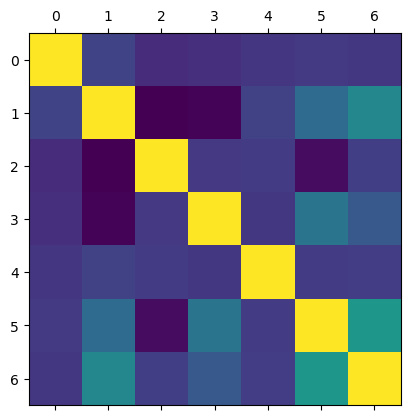

In [19]:
#Save and export heat map
plt.matshow(gun_vio_corr.corr())
plt.show()

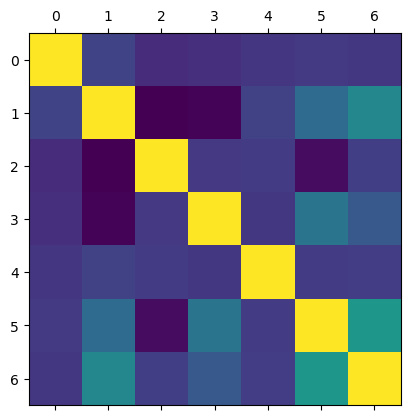

In [20]:
plt.matshow(gun_vio_corr.corr())
plt.savefig('heat_map.png') 

In [21]:
cwd = os.getcwd()

In [22]:
cwd

'C:\\Users\\HP\\03-2024 Gun Violence\\03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

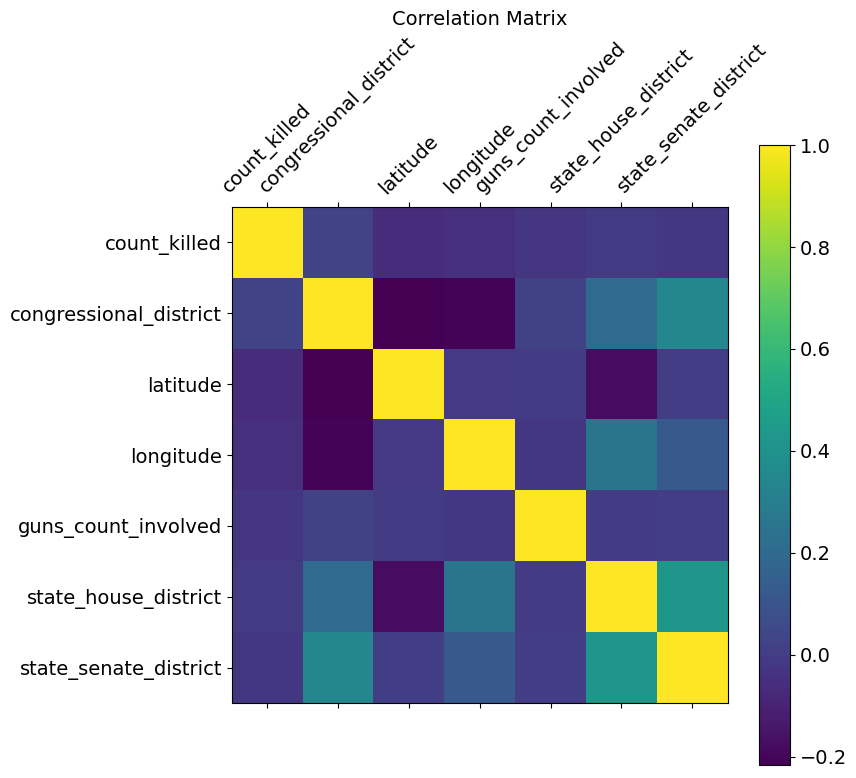

In [23]:
f = plt.figure(figsize=(8, 8)) 
plt.matshow(gun_vio_corr.corr(), fignum=f.number) 
plt.xticks(range(gun_vio_corr.shape[1]), gun_vio_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(gun_vio_corr.shape[1]), gun_vio_corr.columns, fontsize=14) 
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=14) 

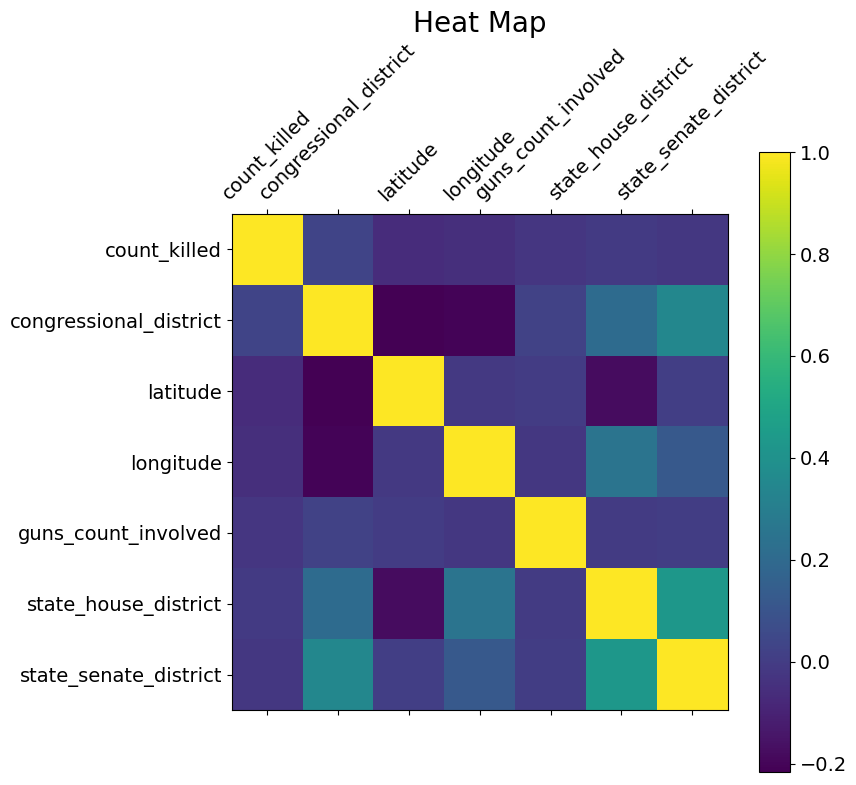

In [24]:
f = plt.figure(figsize=(8, 8)) 
plt.matshow(gun_vio_corr.corr(), fignum=f.number) 
plt.xticks(range(gun_vio_corr.shape[1]), gun_vio_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(gun_vio_corr.shape[1]), gun_vio_corr.columns, fontsize=14) 
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=14)
plt.title('Heat Map', fontsize=20) 
plt.savefig('heat_map1.png')

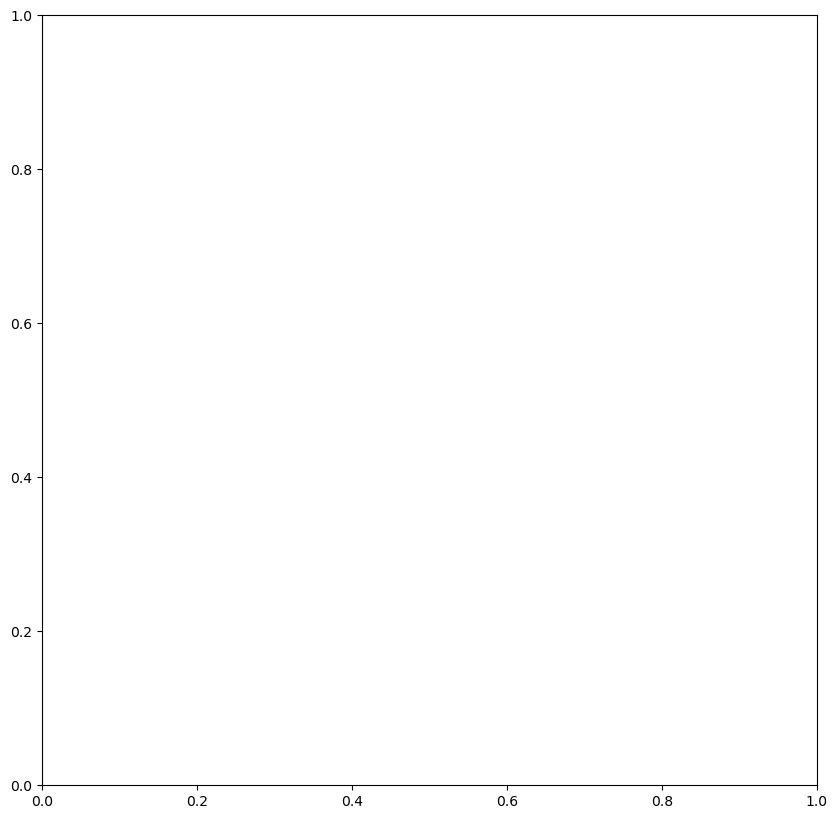

In [25]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

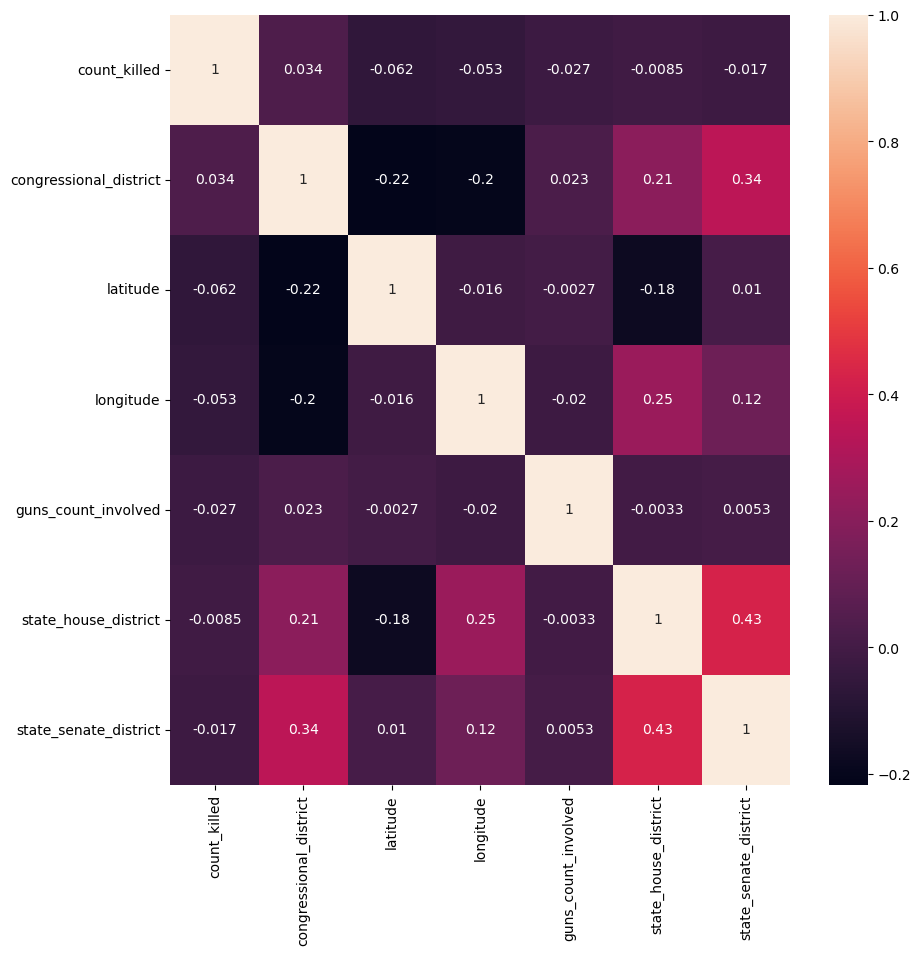

In [26]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(gun_vio_corr.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to
#place the correlation coefficients onto the heatmap

In [27]:
#Question 3 part 2: Discuss what the coefficients in the plot mean in terms of the relationships between the variables:
#There are no strong relationships between variables, however,  state_house_district and state_senate_district have a moderate
#coefficient of 0.43. Congressional_district and state_senate_district has a weak to moderate coefficient of 0.34. From this 
#moderate coefficient, spatial analysis may reveal more meaningful insights.

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


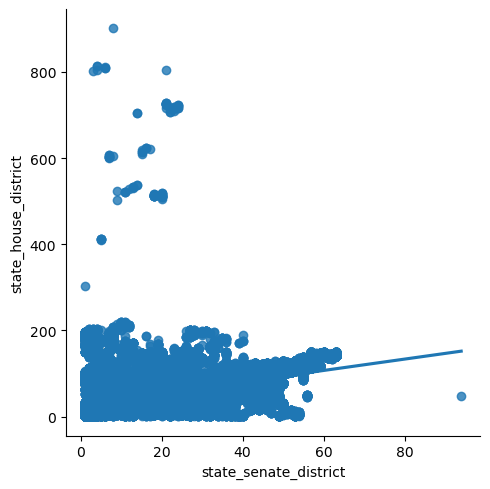

In [28]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/1/24

#Description: Question 4 part 1- Create a scatterplot for state_senate_district, and state_house_district columns in seaborn
"""

sns.lmplot(x = 'state_senate_district', y = 'state_house_district', data = gun_vio_corr)

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


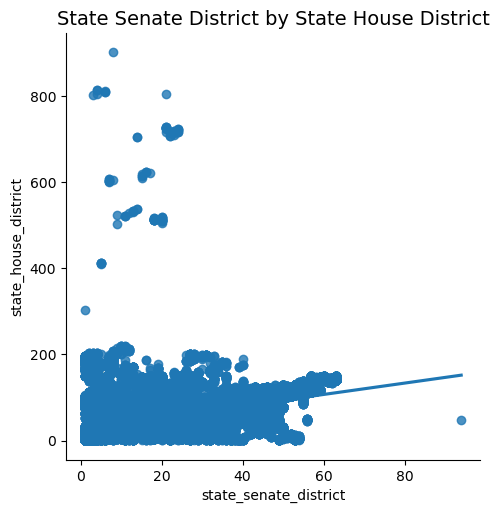

In [29]:
sns.lmplot(x = 'state_senate_district', y = 'state_house_district', data = gun_vio_corr)
plt.title('State Senate District by State House District', fontsize=14) 
plt.savefig('scatterplot.png')
plt.show()

In [30]:
#Question 4 part 2: #There are many points that are not on or near the line, especially as it extends out. There are outliers that can be seen as well.
#I am curious to complete geo spatial analysis as it will bring more understanding to the scatterplot results.

In [31]:
gun_vio_pair=gun_vio.filter(['count_killed', 'count_of_injured','congressional_district', 'latitude', 'longitude', 'guns_count_involved', 'state_house_district', 'state_senate_district', 'city_or_county'], axis=1)

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

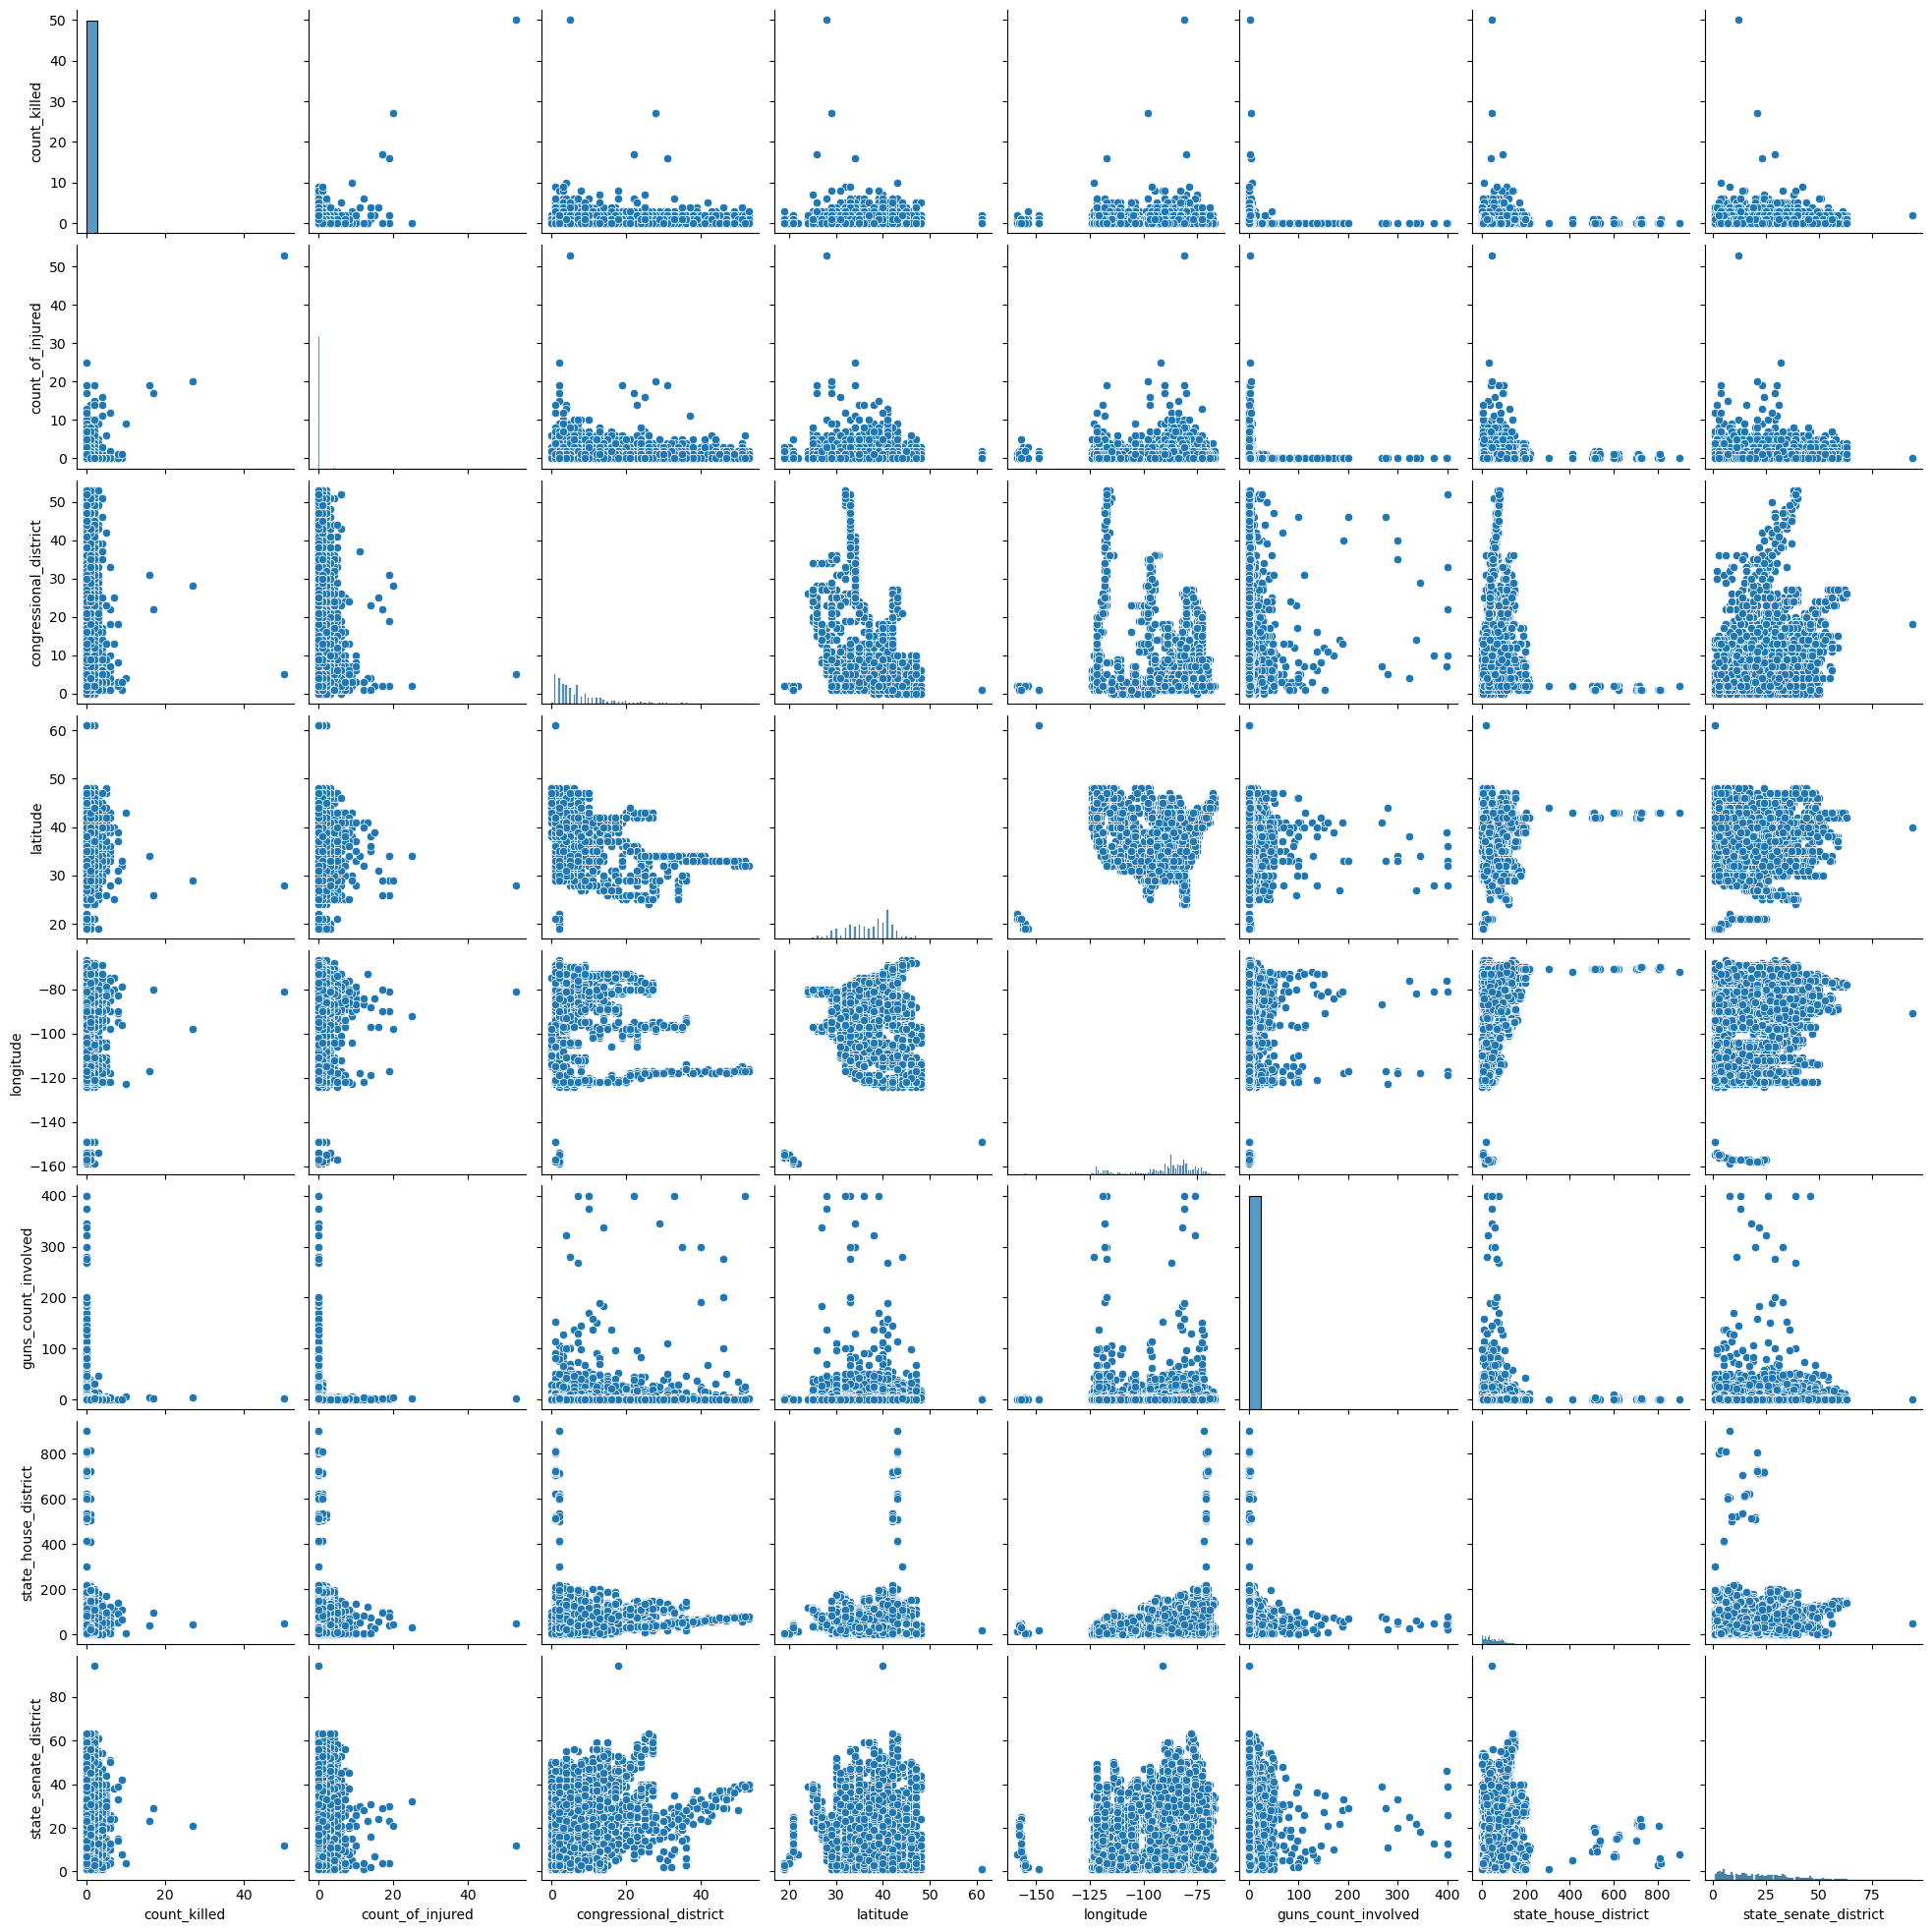

In [32]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/1/24

#Description: Question 5- Create a pair plot of the entire data set.
"""

# Create a pair plot of df gun_vio_pair to explore these numerical variables further and their distribution along with the categorical variable ciry_or_county
pair = sns.pairplot(gun_vio_pair)

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

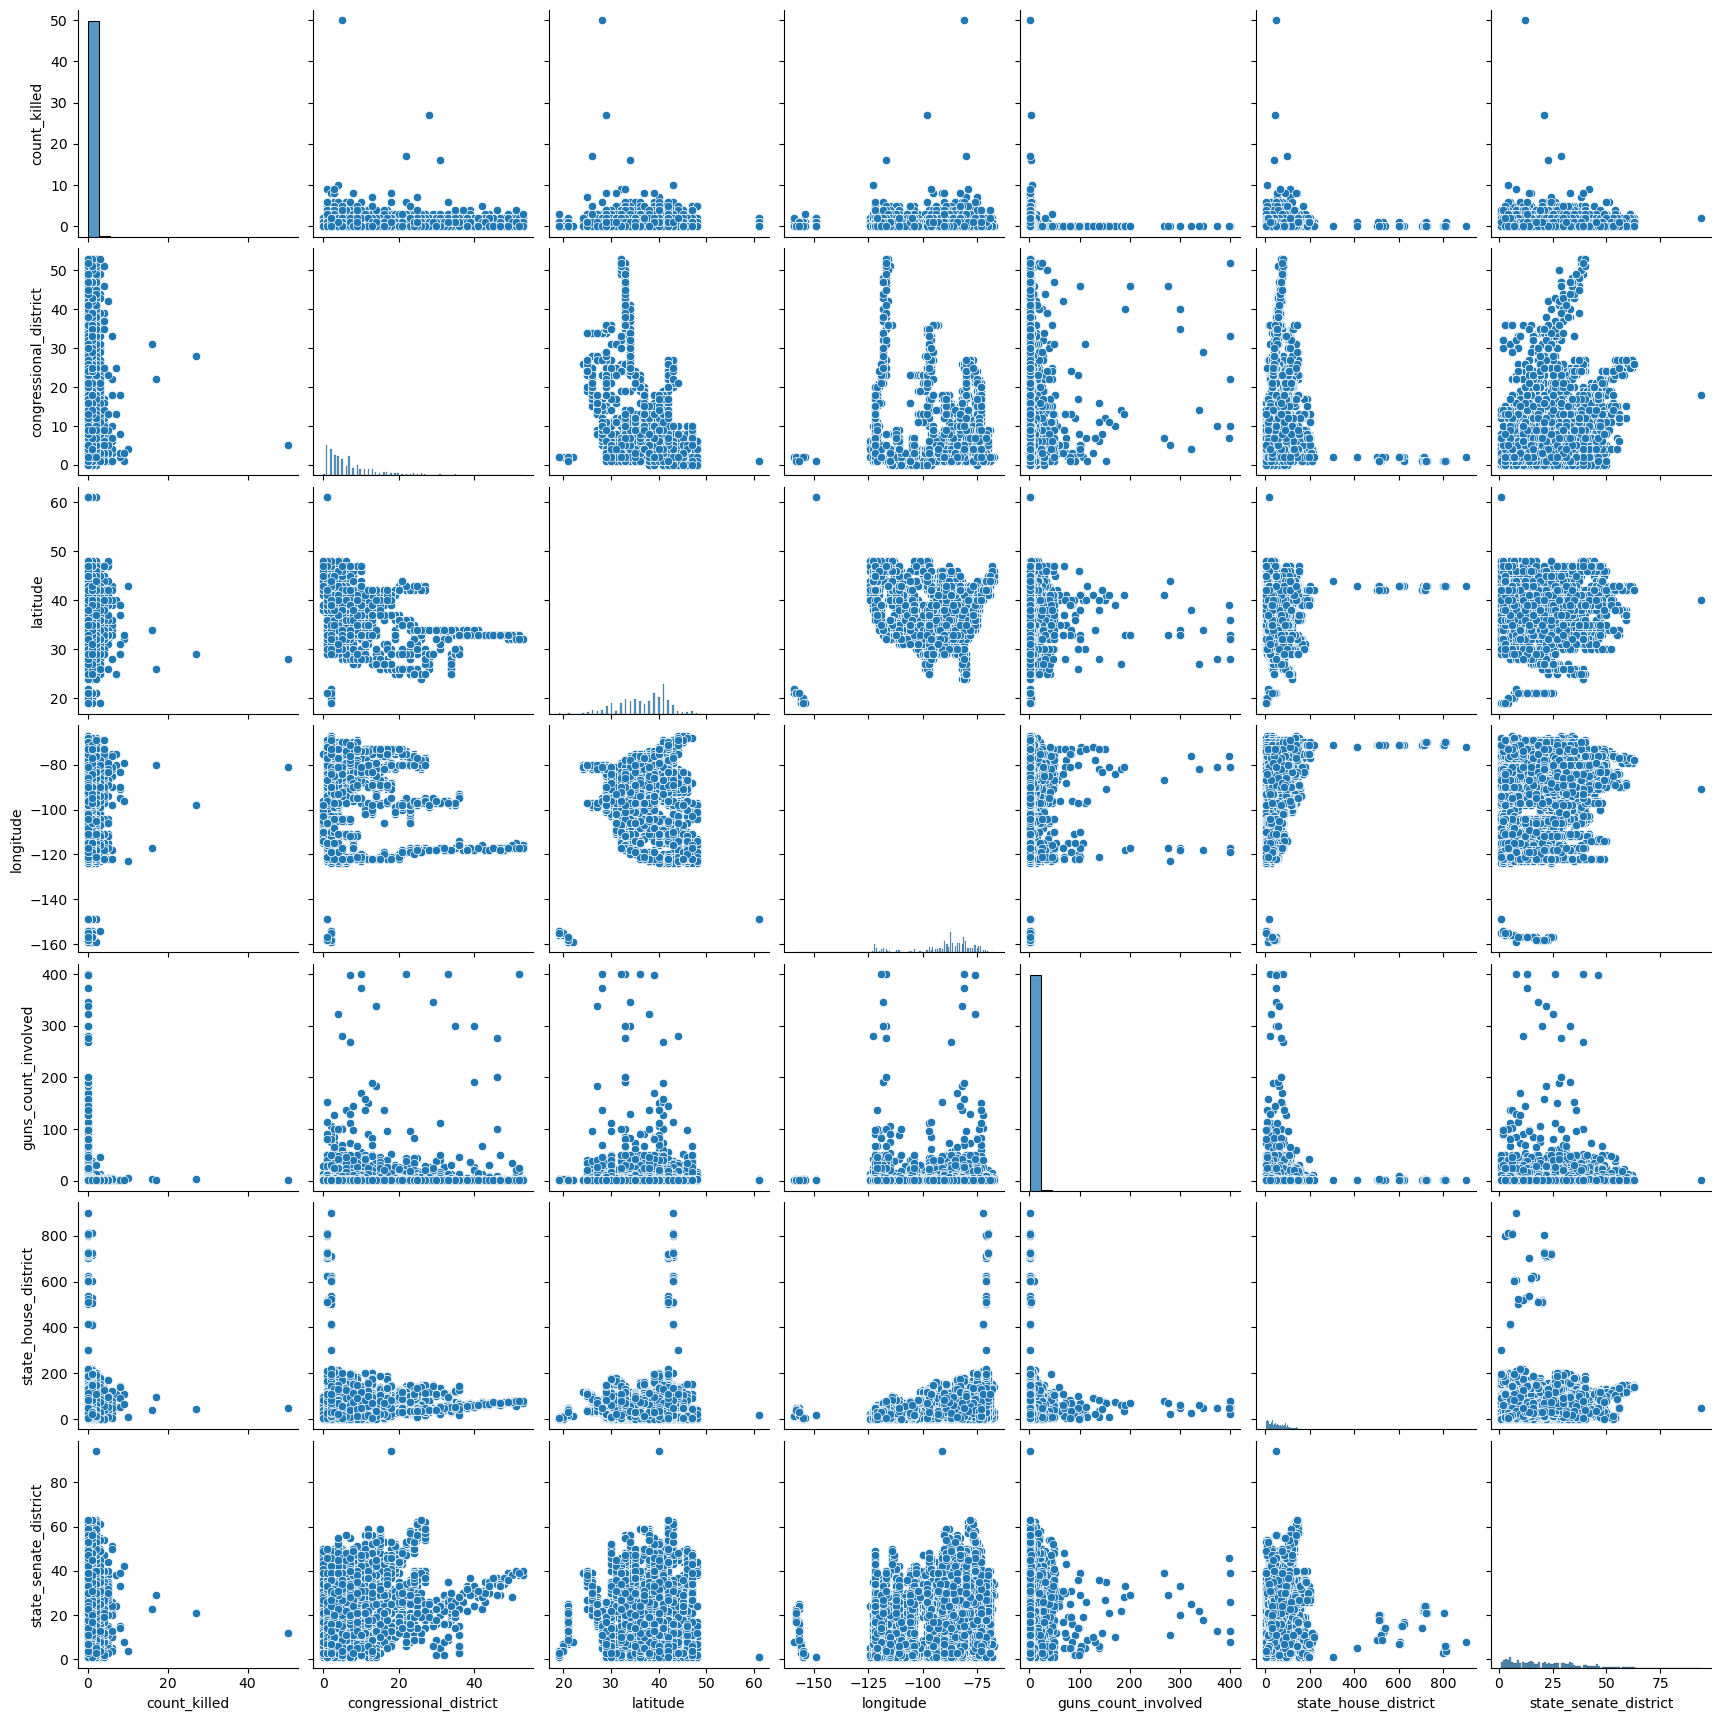

In [33]:
# Alternate pair plot of df gun_vio_corr
paire = sns.pairplot(gun_vio_corr)

In [ ]:
#From the results of the pair-plot I would like to explore the variables of congressional_district, longitude, latitude, 
#state_senate_district, and count_killed further. The scatter plts show various possible relationships between these variables
#and they appear to be the most reliable predictors for further analysis.

In [34]:
gun_vio_pair['count_killed']=gun_vio_pair['count_killed'].astype("int")

In [37]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/1/24

#Description: Question 6- Create a categorical plot and interpret the results
"""

#Create copy of count_killed column to create a categorical variable that splits the count_killed column into categories
gun_vio_pair['count_killed_duplicate'] = gun_vio_pair.loc[:, 'count_killed']

In [38]:
gun_vio_pair.head()

,count_killed,count_of_injured,congressional_district,latitude,longitude,guns_count_involved,state_house_district,state_senate_district,city_or_county,count_killed_duplicate
2,1,3,9,41,-82,2,56,13,Lorain,1
4,2,2,6,36,-79,2,62,27,Greensboro,2
6,5,0,1,34,-106,2,10,14,Albuquerque,5
10,1,3,3,35,-85,1,28,10,Chattanooga,1
11,1,3,1,38,-90,1,76,4,Saint Louis,1


In [39]:
def killed_groups (row):
    
  if row['count_killed_duplicate'] <= 2:
    return 'low_killed'
  elif (row['count_killed_duplicate'] > 2) and (row['count_killed_duplicate'] <= 5):
    return 'mid_killed'
  elif row['count_killed_duplicate'] > 5:
    return 'high_killed'
  else: return 'Not enough data'

In [40]:
#Apply the function to gun_vio_pair
gun_vio_pair['count_killed_duplicate'] = gun_vio_pair.apply(killed_groups, axis=1)

In [41]:
gun_vio_pair.head()

,count_killed,count_of_injured,congressional_district,latitude,longitude,guns_count_involved,state_house_district,state_senate_district,city_or_county,count_killed_duplicate
2,1,3,9,41,-82,2,56,13,Lorain,low_killed
4,2,2,6,36,-79,2,62,27,Greensboro,low_killed
6,5,0,1,34,-106,2,10,14,Albuquerque,mid_killed
10,1,3,3,35,-85,1,28,10,Chattanooga,low_killed
11,1,3,1,38,-90,1,76,4,Saint Louis,low_killed


In [42]:
#Print frequency of new column 
gun_vio_pair['count_killed_duplicate'].value_counts(dropna = False)

count_killed_duplicate
low_killed     112191
mid_killed        422
high_killed        23
Name: count, dtype: int64

In [43]:
gun_vio_pair.rename(columns={"count_killed_duplicate": "killed_category"})

,count_killed,count_of_injured,congressional_district,latitude,longitude,guns_count_involved,state_house_district,state_senate_district,city_or_county,killed_category
2,1,3,9,41,-82,2,56,13,Lorain,low_killed
4,2,2,6,36,-79,2,62,27,Greensboro,low_killed
6,5,0,1,34,-106,2,10,14,Albuquerque,mid_killed
10,1,3,3,35,-85,1,28,10,Chattanooga,low_killed
11,1,3,1,38,-90,1,76,4,Saint Louis,low_killed
...,...,...,...,...,...,...,...,...,...,...
227728,0,0,5,47,-117,1,4,4,Spokane (Spokane Valley),low_killed
227729,1,0,4,31,-93,1,23,31,Natchitoches,low_killed
227730,0,1,2,29,-90,1,85,7,Gretna,low_killed
227731,1,0,9,29,-95,1,149,17,Houston,low_killed


In [54]:
gun_vio_pair['count_killed'] = gun_vio_pair['count_killed'].astype(dtype='object')

In [55]:
gun_vio_pair['city_or_county'] = gun_vio_pair['city_or_county'].astype(dtype='object')

In [57]:
gun_vio_pair['count_killed_duplicate'] = gun_vio_pair['count_killed_duplicate'].astype(dtype='object')

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


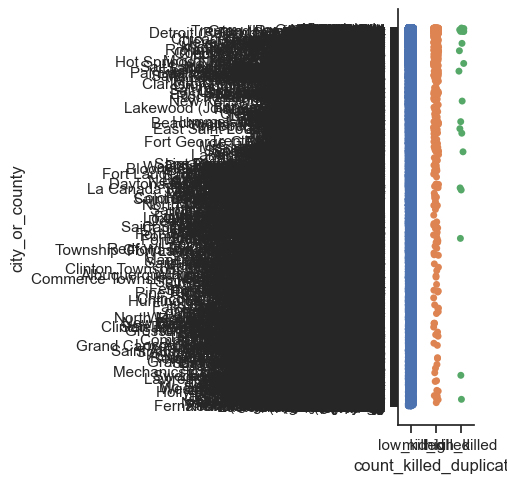

In [61]:
sns.set(style="ticks")
g = sns.catplot(x= 'count_killed_duplicate', y='city_or_county', hue='count_killed_duplicate', data=gun_vio_pair)

In [62]:
gun_vio_pair['congressional_district'] = gun_vio_pair['congressional_district'].astype(dtype='object')

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


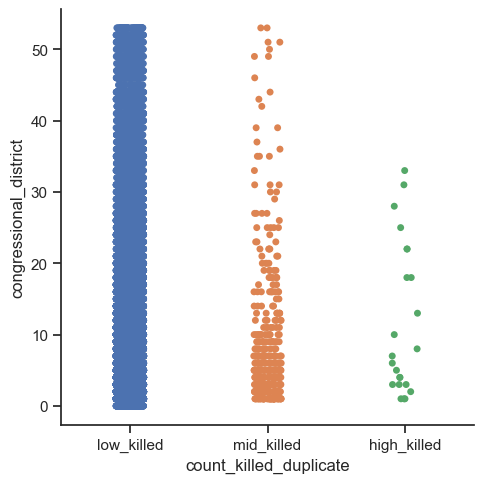

In [63]:
sns.set(style="ticks")
g = sns.catplot(x= 'count_killed_duplicate', y='congressional_district', hue='count_killed_duplicate', data=gun_vio_pair)

In [64]:
#The low_killed group is evenly distributed throughout all congressional districts. The mid and high killed groups are concentrated 
#in the congressional districts approx. 20 and below. This gives clues that geo-spatial analysis in needed, and that there is a
#connection between incidents and U.S. region

In [ ]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/1/24

#Description: Question 7 #Revisit the questions you generated in the previous task and write answers to those you can based 
on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your 
visual exploration.
"""

#Since key questions created in 6.1 are mainly spatial analysis based, there are no answers yet for the project questions so far
#but key insights were gathered in preparation of the next steps. From the tell tale signs of the plots created here in 6.2,
#some States may experience more gun violence than others.

In [1]:
"""
File: gun_vio_clean.csv
Author:Erica Henry
Date: 04/1/24

#Description: Question 8- Define any hypotheses that you can at this point. You’ll be testing these later on.
"""

# High frequency counts of gun violence deaths does not occur across the United States but only in certain states.

'\nFile: gun_vio_clean.csv\nAuthor:Erica Henry\nDate: 04/1/24\n\n#Description: Question 8- Define any hypotheses that you can at this point. You’ll be testing these later on.\n'